In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Loading dataset
**Pima Indians Diabetes**
[Dataset link](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)

In [2]:
df = pd.read_csv(r'..\datasets\diabetes.csv')

In [3]:
df.shape

(768, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.sample(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
138,0,129,80,0,0,31.2,0.703,29,0
356,1,125,50,40,167,33.3,0.962,28,1
248,9,124,70,33,402,35.4,0.282,34,0
18,1,103,30,38,83,43.3,0.183,33,0
584,8,124,76,24,600,28.7,0.687,52,1
759,6,190,92,0,0,35.5,0.278,66,1
404,5,168,64,0,0,32.9,0.135,41,1
557,8,110,76,0,0,27.8,0.237,58,0
549,4,189,110,31,0,28.5,0.680,37,0
736,0,126,86,27,120,27.4,0.515,21,0


**Because 0 in Glucose, BloodPressure, SkinThickness, Insulin and BMI make no sense we can make them NaN**

In [7]:
data_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in data_to_replace:
    df[col].replace(0, np.NaN, inplace=True)

df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [8]:
df.sample(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
747,1,81.0,74.0,41.0,57.0,46.3,1.096,32,0
489,8,194.0,80.0,NaN,NaN,26.1,0.551,67,0
71,5,139.0,64.0,35.0,140.0,28.6,0.411,26,0
684,5,136.0,82.0,NaN,NaN,NaN,0.640,69,0
271,2,108.0,62.0,32.0,56.0,25.2,0.128,21,0
608,0,152.0,82.0,39.0,272.0,41.5,0.270,27,0
756,7,137.0,90.0,41.0,NaN,32.0,0.391,39,0
458,10,148.0,84.0,48.0,237.0,37.6,1.001,51,1
38,2,90.0,68.0,42.0,NaN,38.2,0.503,27,1
430,2,99.0,NaN,NaN,NaN,22.2,0.108,23,0


## Data visualization

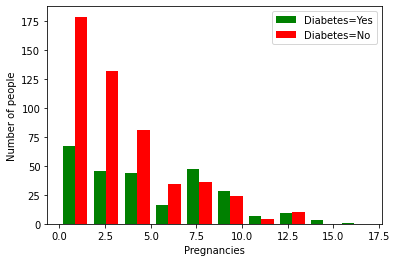

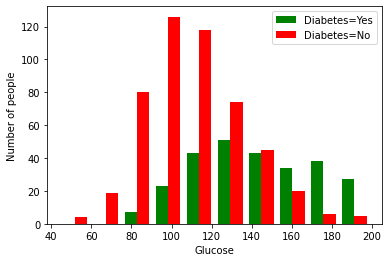

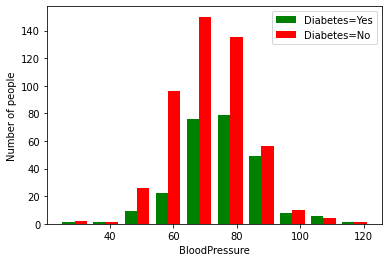

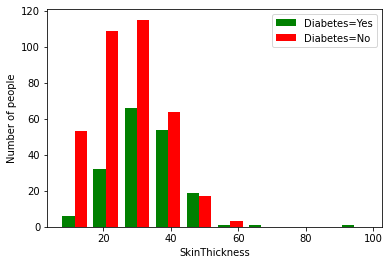

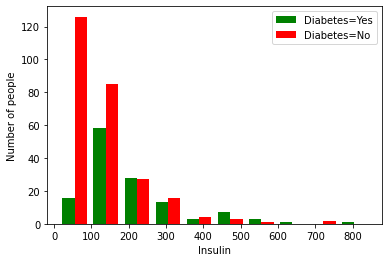

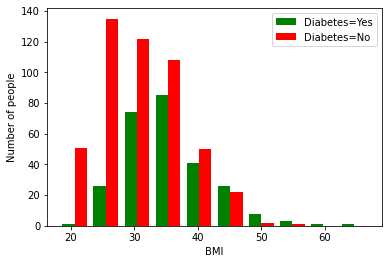

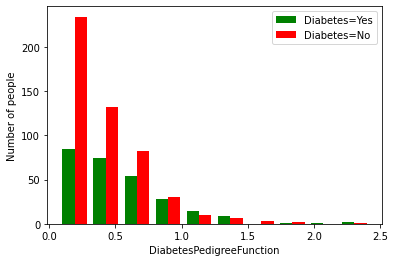

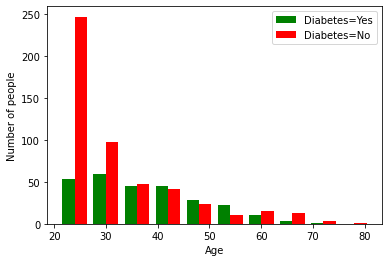

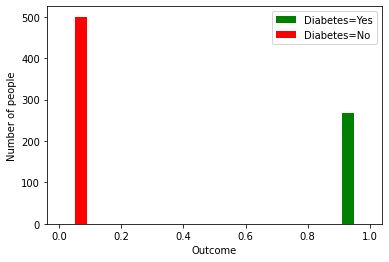

In [9]:
for col in df.columns.values:
    plt.xlabel(col)
    plt.ylabel('Number of people')
    plt.hist([df[df.Outcome==1][col], df[df.Outcome==0][col]], color=['green', 'red'], label=['Diabetes=Yes', 'Diabetes=No'])
    plt.legend()
    plt.show()

<AxesSubplot:>

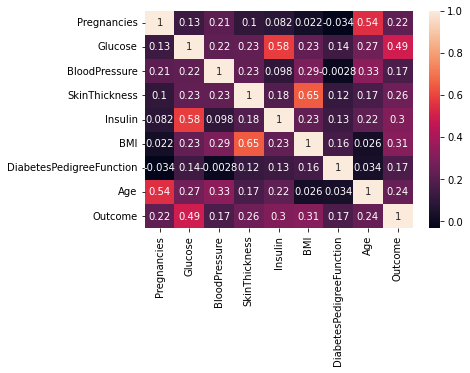

In [10]:
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:xlabel='Outcome', ylabel='count'>

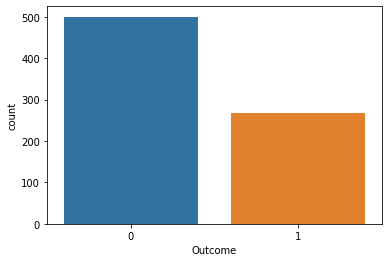

In [11]:
sns.countplot(data=df, x='Outcome')

### We can tell that:
- data is imbalanced
- people with diabetes have different results than healthy people
- the higher is your glucose the higher chance you have diabetes
- people with diabetes have higher BMI

**Because people with diabetes have other results in columns it is safer to separate data to 2 classes**

In [12]:
df1 = df[df.Outcome==1].copy()
df0 = df[df.Outcome==0].copy()

### Missing values

In [13]:
data_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in data_to_replace:
    df1[col].replace(np.NaN, df1[col].mean(), inplace=True)
    df0[col].replace(np.NaN, df0[col].mean(), inplace=True)

In [14]:
df1.sample(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
259,11,155.0,76.0,28.0,150.000000,33.3,1.353,51,1
306,10,161.0,68.0,23.0,132.000000,25.5,0.326,47,1
746,1,147.0,94.0,41.0,206.846154,49.3,0.358,27,1
702,1,168.0,88.0,29.0,206.846154,35.0,0.905,52,1
476,2,105.0,80.0,45.0,191.000000,33.7,0.711,29,1
17,7,107.0,74.0,33.0,206.846154,29.6,0.254,31,1
38,2,90.0,68.0,42.0,206.846154,38.2,0.503,27,1
618,9,112.0,82.0,24.0,206.846154,28.2,1.282,50,1
545,8,186.0,90.0,35.0,225.000000,34.5,0.423,37,1
283,7,161.0,86.0,33.0,206.846154,30.4,0.165,47,1


In [15]:
df0.sample(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
273,1,71.000000,78.0,50.000000,45.000000,33.2,0.422,21,0
224,1,100.000000,66.0,15.000000,56.000000,23.6,0.666,26,0
75,1,110.643863,48.0,20.000000,130.287879,24.7,0.140,22,0
12,10,139.000000,80.0,27.235457,130.287879,27.1,1.441,57,0
183,5,73.000000,60.0,27.235457,130.287879,26.8,0.268,27,0
202,0,108.000000,68.0,20.000000,130.287879,27.3,0.787,32,0
407,0,101.000000,62.0,27.235457,130.287879,21.9,0.336,25,0
486,1,139.000000,62.0,41.000000,480.000000,40.7,0.536,21,0
395,2,127.000000,58.0,24.000000,275.000000,27.7,1.600,25,0
555,7,124.000000,70.0,33.000000,215.000000,25.5,0.161,37,0


In [16]:
print(df1.isnull().sum())
print('=================================')
print(df0.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [17]:
fdf = df0.append(df1)

fdf.sample(15)

C:\Users\Maciek\AppData\Local\Temp\ipykernel_15968\2944992581.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fdf = df0.append(df1)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
619,0,119.0,75.321429,33.000000,206.846154,32.400000,0.141,24,1
90,1,80.0,55.000000,27.235457,130.287879,19.100000,0.258,21,0
142,2,108.0,52.000000,26.000000,63.000000,32.500000,0.318,22,0
455,14,175.0,62.000000,30.000000,206.846154,33.600000,0.212,38,1
403,9,72.0,78.000000,25.000000,130.287879,31.600000,0.280,38,0
685,2,129.0,74.000000,26.000000,205.000000,33.200000,0.591,25,0
690,8,107.0,80.000000,27.235457,130.287879,24.600000,0.856,34,0
424,8,151.0,78.000000,32.000000,210.000000,42.900000,0.516,36,1
406,4,115.0,72.000000,33.000000,206.846154,28.900000,0.376,46,1
451,2,134.0,70.000000,33.000000,206.846154,28.900000,0.542,23,1


### Dealing with outliers

<AxesSubplot:xlabel='Glucose'>

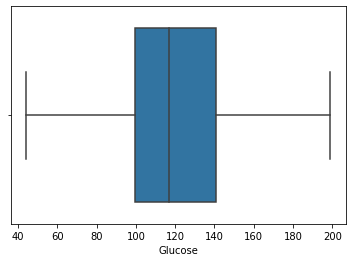

In [18]:
sns.boxplot(x='Glucose', data=fdf)

<AxesSubplot:xlabel='BMI'>

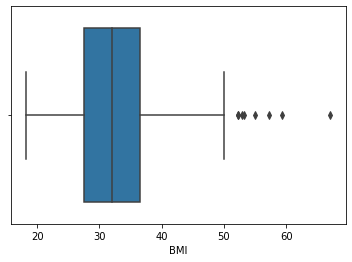

In [19]:
sns.boxplot(x='BMI', data=fdf)

<AxesSubplot:xlabel='Insulin'>

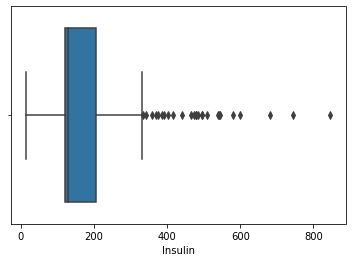

In [20]:
sns.boxplot(x='Insulin', data=fdf)

<AxesSubplot:xlabel='SkinThickness'>

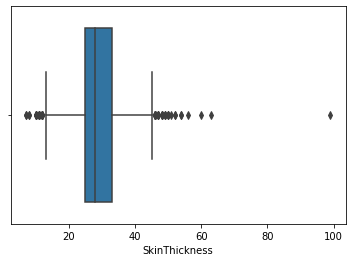

In [21]:
sns.boxplot(x='SkinThickness', data=fdf)

<AxesSubplot:>

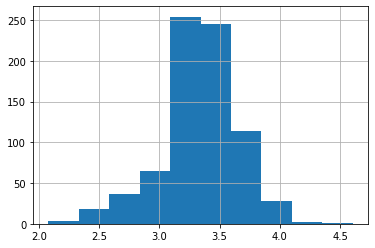

In [22]:
fdf['SkinThickness'] = np.log(fdf.SkinThickness + 1)
fdf['SkinThickness'].hist()

<AxesSubplot:xlabel='SkinThickness'>

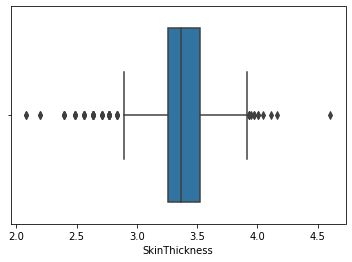

In [23]:
sns.boxplot(x='SkinThickness', data=fdf)

In [24]:
outliers_cols = ['Insulin', 'SkinThickness', 'BMI']

for col in outliers_cols:
    Q1 = fdf[col].quantile(0.25)
    Q3 = fdf[col].quantile(0.75)
    IQR = Q3 - Q1

    low = Q1 - (1.5 * IQR)
    up = Q3 + (1.5 * IQR)

    fdf[col] = np.where(fdf[col] > up, up, np.where(fdf[col] < low, low, fdf[col]))

<AxesSubplot:xlabel='Insulin'>

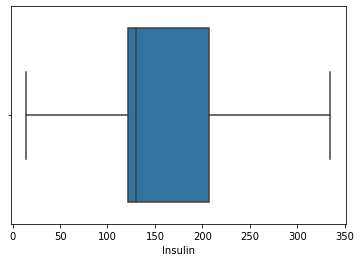

In [25]:
sns.boxplot(x='Insulin', data=fdf)

<AxesSubplot:xlabel='SkinThickness'>

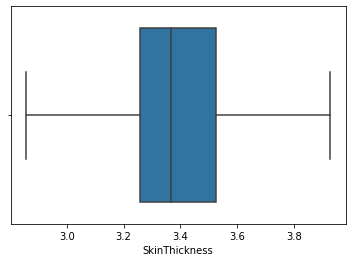

In [26]:
sns.boxplot(x='SkinThickness', data=fdf)

<AxesSubplot:xlabel='BMI'>

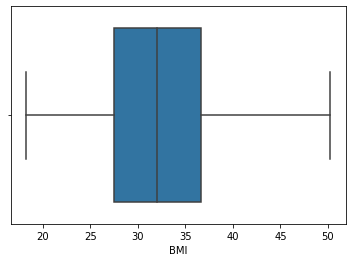

In [27]:
sns.boxplot(x='BMI', data=fdf)

### Scaling

In [28]:
from sklearn.preprocessing import StandardScaler

X = fdf.drop('Outcome', axis='columns')
y = fdf['Outcome']

scaler = StandardScaler()
X_data = scaler.fit_transform(X)

X_final = pd.DataFrame(X_data, columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])

print(X.shape)
print(y.shape)

(768, 8)
(768,)


In [29]:
X_final.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,-6.476301e-17,3.700743e-16,-6.938894e-16,-4.070818e-16,1.480297e-16,8.696747e-16,-1.110223e-16,2.127927e-16
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.141852e+00,-2.552294e+00,-4.002935e+00,-1.943706e+00,-2.039476e+00,-2.127593e+00,-1.189553e+00,-1.041549e+00
25%,-8.448851e-01,-7.209525e-01,-6.966465e-01,-4.490848e-01,-4.451437e-01,-7.326539e-01,-6.889685e-01,-7.862862e-01
50%,-2.509521e-01,-1.543043e-01,-3.538894e-02,-4.348551e-02,-3.148107e-01,-5.018349e-02,-3.001282e-01,-3.608474e-01
75%,6.399473e-01,6.340758e-01,6.258687e-01,5.473291e-01,8.206247e-01,6.322869e-01,4.662269e-01,6.602056e-01
max,3.906578e+00,2.539328e+00,4.097471e+00,2.041950e+00,2.719277e+00,2.679698e+00,5.883565e+00,4.063716e+00


### Sampling

We will use SMOTE to balance data

In [30]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_balanced, y_balanced = smote.fit_resample(X_final, y)

y_balanced.value_counts()

0    500
1    500
Name: Outcome, dtype: int64

### Saving preprocessed dataset


In [31]:
X_balanced.to_csv(r'..\datasets\diabetes_X.csv', sep=',', index=None)
y_balanced.to_csv(r'..\datasets\diabetes_y.csv', sep=',', index=None)